In [1]:
# import libraries and modules

import torch

from setup import *

from axis_angle import *

from analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


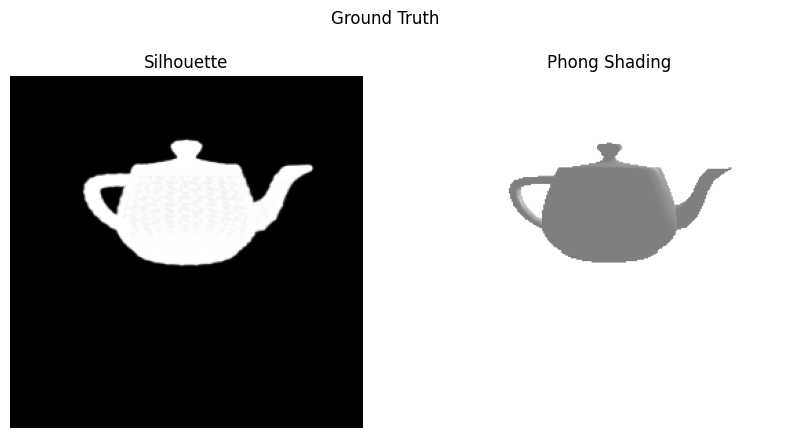

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

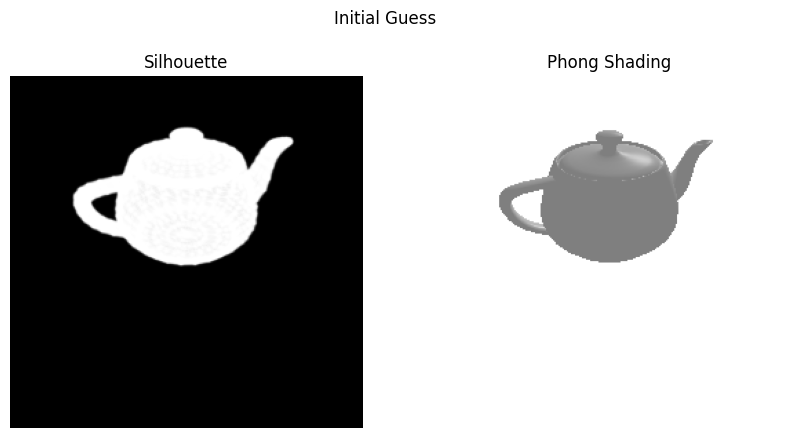

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)
plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

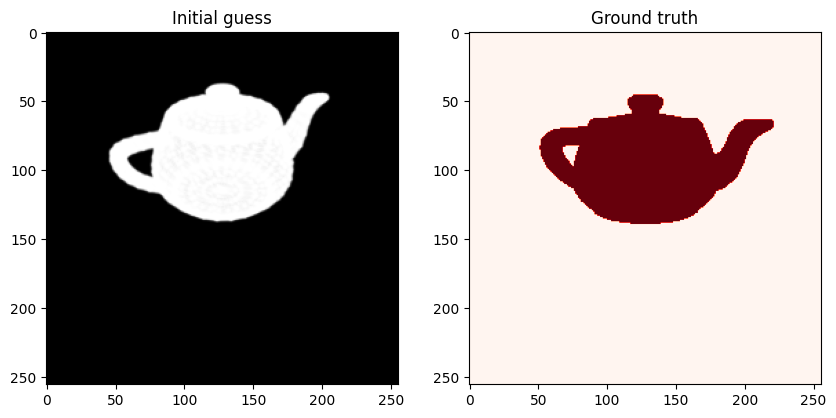

  0%|          | 0/15 [00:10<?, ?it/s]

iteration: 0, loss: 3474.9228515625


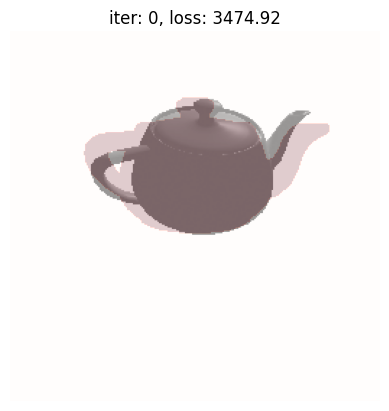

 13%|█▎        | 2/15 [00:20<02:10, 10.05s/it]

iteration: 1, loss: 2816.82275390625


 20%|██        | 3/15 [00:29<01:57,  9.81s/it]

iteration: 2, loss: 2589.5771484375


 27%|██▋       | 4/15 [00:39<01:46,  9.64s/it]

iteration: 3, loss: 2298.58447265625


 33%|███▎      | 5/15 [00:48<01:34,  9.46s/it]

iteration: 4, loss: 2121.646240234375


 40%|████      | 6/15 [00:57<01:24,  9.35s/it]

iteration: 5, loss: 1816.974609375


 47%|████▋     | 7/15 [01:06<01:13,  9.24s/it]

iteration: 6, loss: 1425.2052001953125


 53%|█████▎    | 8/15 [01:15<01:04,  9.19s/it]

iteration: 7, loss: 1334.4625244140625


 60%|██████    | 9/15 [01:24<00:55,  9.23s/it]

iteration: 8, loss: 4032.8896484375


 67%|██████▋   | 10/15 [01:33<00:45,  9.17s/it]

iteration: 9, loss: 3591.860595703125


 67%|██████▋   | 10/15 [01:42<00:45,  9.17s/it]

iteration: 10, loss: 2887.063720703125


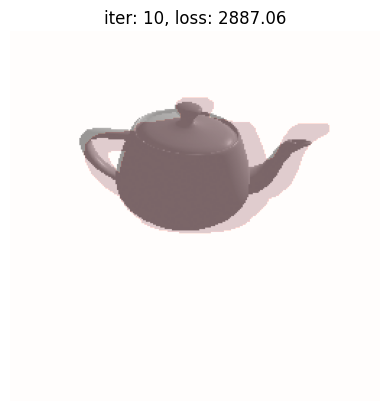

 80%|████████  | 12/15 [01:52<00:27,  9.24s/it]

iteration: 11, loss: 2147.2158203125


 87%|████████▋ | 13/15 [02:01<00:18,  9.25s/it]

iteration: 12, loss: 1846.7078857421875


 93%|█████████▎| 14/15 [02:11<00:09,  9.25s/it]

iteration: 13, loss: 1939.6717529296875


100%|██████████| 15/15 [02:20<00:00,  9.35s/it]

iteration: 14, loss: 3169.810302734375


In [6]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 15, device)

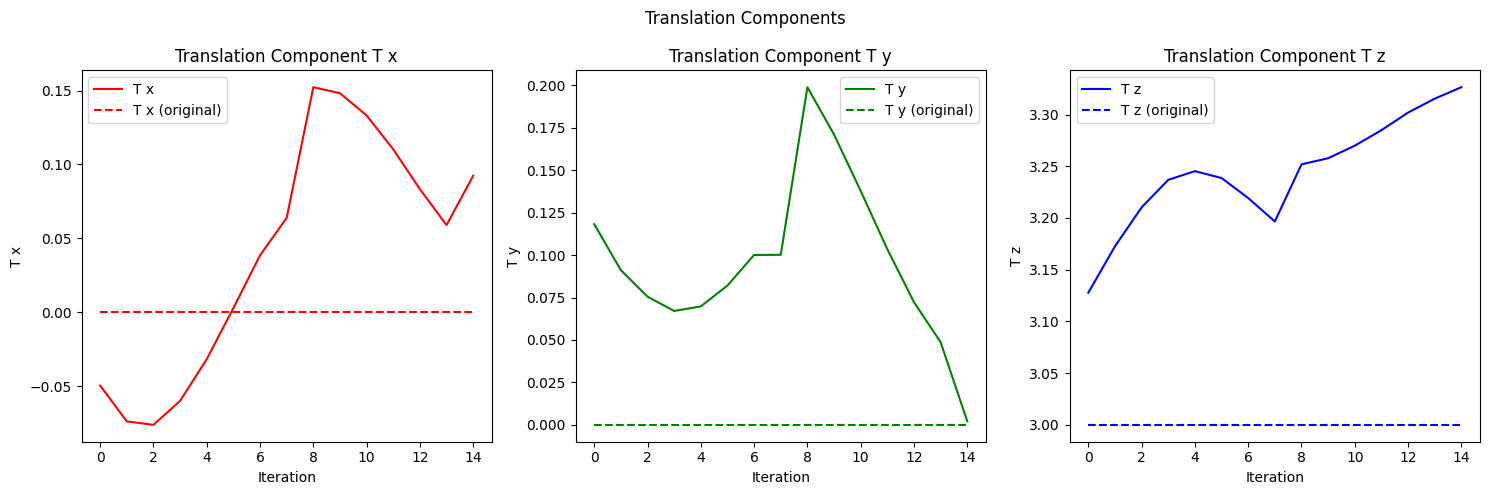

In [7]:
plot_translations(T_gt, parameter_updates)

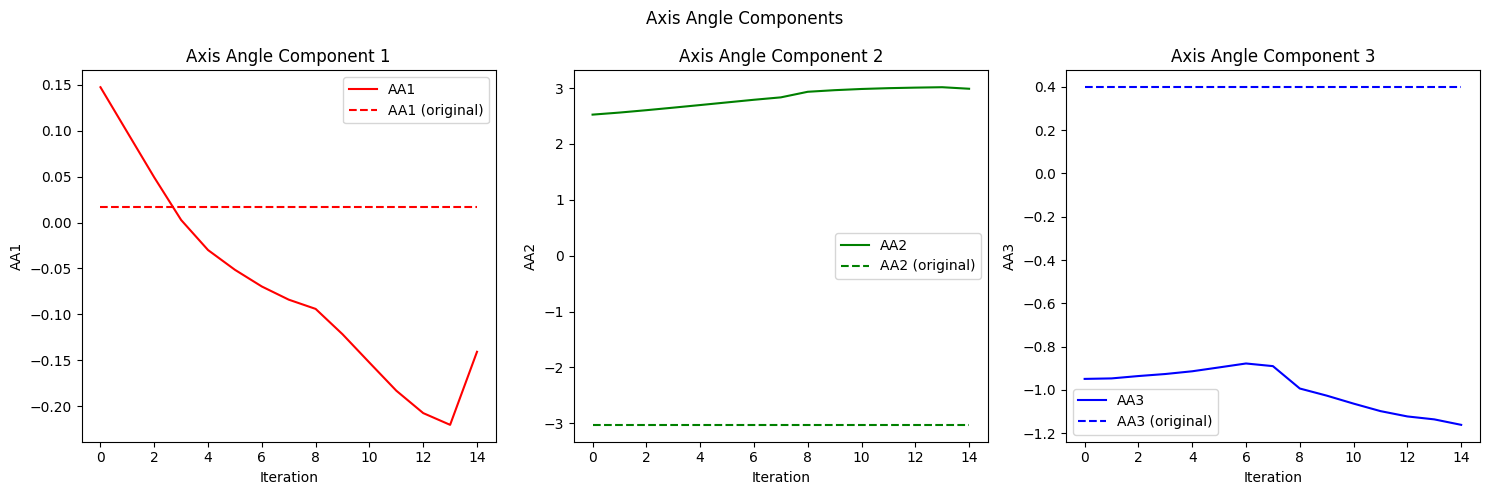

In [8]:
plot_axis_angles(R_gt, parameter_updates)